<a href="https://colab.research.google.com/github/TanushGoel/Breast-Histopathology-IDC-Classification/blob/master/Breast_Histopathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  AI Pathologist 
## For Invasive Ductal Carcinoma Detection

### Background

Invasive ductal carcinoma (IDC), also known as infiltrating ductal carcinoma, is cancer that began growing in a milk duct and has invaded the fibrous or fatty tissue of the breast outside of the duct. 

Invasive means that the cancer has “invaded” or spread to the surrounding breast tissues. 

Ductal means that the cancer began in the milk ducts, which are the “pipes” that carry milk from the milk-producing lobules to the nipple. 

Carcinoma refers to any cancer that begins in the skin or other tissues that cover internal organs, such as breast tissue. 

All together, “invasive ductal carcinoma” refers to cancer that has broken through the walls of the milk ducts and begun to invade the tissues of the breast. 

Over time, invasive ductal carcinoma can spread to the lymph nodes and possibly to other areas of the body. 

IDC starts in the cells that line a milk duct in the breast, breaks through the wall of the duct, and grows into the nearby breast tissues. 

At this point, it may be able to spread (metastasize) to other parts of the body through the lymph system and bloodstream.

According to the American Cancer Society, about two-thirds of women are 55 or older when they are diagnosed with invasive breast cancer. 

Invasive ductal carcinoma also affects men.

### Problem

More women are diagnosed with breast cancer than any other cancer, besides skin cancer. 

As with any breast cancer, there may be no signs or symptoms. 

Invasive ductal carcinoma is the most common form of invasive breast cancer and represents 80 percent of breast cancer cases/diagnoses.

A mammogram may reveal a suspicious mass, which will lead to further testing including biopsies, which involve taking out some or all of the abnormal-looking tissue for examination by a pathologist (a doctor trained to diagnose cancer from biopsy samples) under a microscope. 

More than 1 million women have breast biopsies each year in the United States. 

About 20 percent of these biopsies yield a diagnosis of breast cancer. 

This year, an estimated 268,600 women in the United States will be diagnosed with invasive breast cancer and 2,670 men in the United States will be diagnosed with breast cancer.

It is estimated that 42,260 deaths (41,760 women and 500 men) from breast cancer will occur this year. 

### Data

I used the 1.64GB breast histopathology image dataset provided by Kaggle: https://www.kaggle.com/paultimothymooney/breast-histopathology-images 

The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x.

From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). 

These pictures could be fed into an algorithm which would be able to classify whether invasive ductal carcinoma is present in an image.

### References

Breast Biopsy - 
https://www.choosingwisely.org/patient-resources/breast-biopsy/

Breast Cancer - Statistics - 
https://www.cancer.net/cancer-types/breast-cancer/statistics

Breast Histopathology Images - Paul Mooney - 
https://www.kaggle.com/paultimothymooney/breast-histopathology-images

Information and Resources About For Cancer: Breast, Colon, Lung, Prostate, Skin - 
https://www.cancer.org/

Invasive Ductal Carcinoma: Diagnosis, Treatment, and More - 
https://www.breastcancer.org/symptoms/types/idc

Invasive Ductal Carcinoma (idc) Breast Cancer: Johns Hopkins Breast Center - Ken Brown -https://www.hopkinsmedicine.org/breast_center/breast_cancers_other_conditions/invasive_ductal_carcinoma.html

## Imports and Dependencies


In [0]:
!pip3 -q install tensorflow==1.14.0

In [0]:
!pip3 -q install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import os
from os.path import isfile
import tensorflow as tf
import keras
from keras.utils import np_utils
import itertools
import shutil
np.random.seed(42)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [4]:
tf.__version__

'1.14.0'

In [5]:
tf.keras.__version__

'2.2.4-tf'

## Data Extraction

### Unzip uploaded file

In [0]:
# upload zipped 'IDC_regular_ps50_idx5.zip' before this step
!unzip -o -q 'IDC_regular_ps50_idx5.zip'

# -f  freshen existing files, create none
# -n  never overwrite existing files
# -q  quiet mode (-qq => quieter)
# -o  overwrite files WITHOUT prompting

### Unzip file directly from Kaggle (saves personal storage and uploads to Colab faster)

A token is required from Kaggle - 'kaggle.json'

To obtain the token, go to kaggle.com > Your Profile (Profile Icon) > My Account > API > Create New API Token

In [0]:
!pip3 -q install kaggle

In [7]:
# upload kaggle token 'kaggle.json'
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanushgoel","key":"d93e3bf45ffc4d563c8df92c3013fa42"}'}

In [8]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/kaggle/kaggle.json

chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [9]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

 99% 1.48G/1.49G [00:30<00:00, 51.9MB/s]
100% 1.49G/1.49G [00:30<00:00, 51.9MB/s]


In [0]:
!unzip -o -q 'breast-histopathology-images.zip'
!unzip -o -q 'IDC_regular_ps50_idx5.zip'

# -f  freshen existing files, create none
# -n  never overwrite existing files
# -q  quiet mode (-qq => quieter)
# -o  overwrite files WITHOUT prompting

## Copy Data Into Directories

all_images_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images



In [0]:
# Create a new directory to store all available images
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)

# Create Positive subdirectory within all images
os.mkdir('all_images_dir/1')
os.mkdir('all_images_dir/0')

In [12]:
# copies all images from their seperate folders into the same 
# folder called all_images_dir


# create a list of all patient id's
# each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'

cur_dir = os.getcwd()
patient_list = os.listdir(cur_dir)

for patient in patient_list:
  
  try:
    
    path_0 = str(patient) + '/0'
    path_1 = str(patient) + '/1'

    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, '0', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, '1', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        
  except:
     print(patient, 'cannot be copied into proper folder')

.config cannot be copied into proper folder
IDC_regular_ps50_idx5.zip cannot be copied into proper folder
breast-histopathology-images.zip cannot be copied into proper folder
all_images_dir cannot be copied into proper folder
sample_data cannot be copied into proper folder


In [13]:
# Check how many images are in each folder

print('Total:', len(os.listdir('all_images_dir/1'))+len(os.listdir('all_images_dir/0')))
print('Positive:', len(os.listdir('all_images_dir/1')))
print('Negative:', len(os.listdir('all_images_dir/0')))

Total: 277524
Positive: 78786
Negative: 198738


## Make Dataframe of Image Info.

In [0]:
# Create a dataframe containing all the information

image_list_1 = os.listdir('all_images_dir/1')
df_data_1 = pd.DataFrame(image_list_1, columns=['image_id'])

image_list_0 = os.listdir('all_images_dir/0')
df_data_0 = pd.DataFrame(image_list_0, columns=['image_id'])

df_data = pd.concat([df_data_1, df_data_0])

In [15]:
df_data.head()

,image_id
0,12907_idx5_x2101_y1601_class1.png
1,14192_idx5_x701_y1151_class1.png
2,13023_idx5_x1001_y951_class1.png
3,8980_idx5_x1501_y1051_class1.png
4,9323_idx5_x1351_y1151_class1.png


In [16]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head()

,image_id,patient_id,target
0,12907_idx5_x2101_y1601_class1.png,12907,1
1,14192_idx5_x701_y1151_class1.png,14192,1
2,13023_idx5_x1001_y951_class1.png,13023,1
3,8980_idx5_x1501_y1051_class1.png,8980,1
4,9323_idx5_x1351_y1151_class1.png,9323,1


Text(0.5, 1.0, 'Class Distributions')

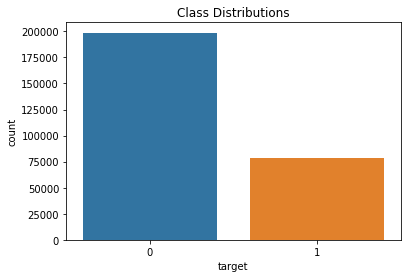

In [17]:
sns.countplot(df_data['target']).set_title('Class Distributions')

## Train/Valid/Test Split

In [19]:
from sklearn.model_selection import train_test_split

y = df_data['target']

_, df_test = train_test_split(df_data, test_size=0.03603, random_state=42, stratify=y)

_, df_val = train_test_split(df_data, test_size=0.0036025, random_state=42, stratify=y)

print('Valid:', df_val.shape[0])
print('Test:', df_test.shape[0])

Valid: 1000
Test: 10000


In [20]:
df_val.head()

,image_id,patient_id,target
121626,12930_idx5_x701_y1401_class0.png,12930,0
194027,10282_idx5_x1101_y2251_class0.png,10282,0
123961,12880_idx5_x1051_y2351_class0.png,12880,0
21361,14155_idx5_x3751_y851_class1.png,14155,1
56886,10307_idx5_x1401_y701_class0.png,10307,0


Text(0.5, 1.0, 'Valid Class Distributions')

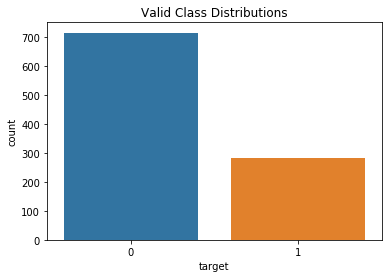

In [21]:
sns.countplot(df_val['target']).set_title('Valid Class Distributions')

In [22]:
df_test.head()

,image_id,patient_id,target
132161,10307_idx5_x2751_y901_class0.png,10307,0
175607,12818_idx5_x451_y1351_class0.png,12818,0
120975,15473_idx5_x2401_y401_class0.png,15473,0
40149,12867_idx5_x1351_y1951_class0.png,12867,0
131004,9320_idx5_x2551_y1601_class0.png,9320,0


Text(0.5, 1.0, 'Test Class Distributions')

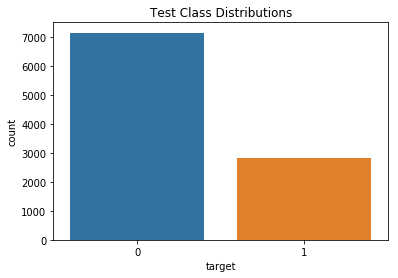

In [23]:
sns.countplot(df_test['target']).set_title('Test Class Distributions')

In [24]:
def identify_train_val_and_test_rows(x):
    # create a list of all the lesion_id's in the val set and test set
    val_list = list(df_val['image_id'])
    test_list = list(df_test['image_id'])
    
    if str(x) in val_list:
        return 'val'
    elif str(x) in test_list:
        return 'test'
    else:
        return 'train'

# create a new colum that is a copy of the image_id column
df_data['train_or_val_or_test'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val_or_test'] = df_data['train_or_val_or_test'].apply(identify_train_val_and_test_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val_or_test'] == 'train']

print('Train:', len(df_train))
print('Valid:', len(df_val))
print('Test:', len(df_test))

Train: 267524
Valid: 1000
Test: 10000


Text(0.5, 1.0, 'Train Class Distributions')

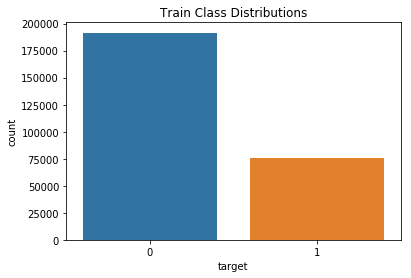

In [25]:
sns.countplot(df_train['target']).set_title('Train Class Distributions')

In [26]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)
df_data.head()

,patient_id,target,train_or_val_or_test
image_id,,,
12907_idx5_x2101_y1601_class1.png,12907,1,train
14192_idx5_x701_y1151_class1.png,14192,1,train
13023_idx5_x1001_y951_class1.png,13023,1,train
8980_idx5_x1501_y1051_class1.png,8980,1,train
9323_idx5_x1351_y1151_class1.png,9323,1,train


## Move Train/Valid/Test Images Into Repective Directories

train_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images


val_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images


test_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images

In [0]:
# Make Train, Valid, and Test Folders

# train_dir
train_dir = os.path.join('train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join('val_dir')
os.mkdir(val_dir)

# test_dir
test_dir = os.path.join('test_dir')
os.mkdir(test_dir)


# Create folders within the train, valid, and test folders
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
os.mkdir(os.path.join(train_dir, '1'))
os.mkdir(os.path.join(train_dir, '0'))

# Create new folders inside val_dir
os.mkdir(os.path.join(val_dir, '1'))
os.mkdir(os.path.join(val_dir, '0'))

# Create new folders inside test_dir
os.mkdir(os.path.join(test_dir, '1'))
os.mkdir(os.path.join(test_dir, '0'))

In [0]:
# Get a list of train, val, and test images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

# Transfer the train images

for image in train_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(train_dir, label, image)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(val_dir, label, image)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the test images
for image in test_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(test_dir, label, image)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [39]:
print('Train Total:', len(os.listdir('train_dir/1'))+len(os.listdir('train_dir/0')))
print('Valid Total:', len(os.listdir('val_dir/1'))+len(os.listdir('val_dir/0')))
print('Test Total:', len(os.listdir('test_dir/1'))+len(os.listdir('test_dir/0')), '\n')

print('Train Negative:', len(os.listdir('train_dir/0')))
print('Train Positive:', len(os.listdir('train_dir/1')), '\n')

print('Valid Negative:', len(os.listdir('val_dir/0')))
print('Valid Positive:', len(os.listdir('val_dir/1')), '\n')

print('Test Negative:', len(os.listdir('test_dir/0')))
print('Test Positive:', len(os.listdir('test_dir/1')))

Train Total: 267524
Valid Total: 1000
Test Total: 10000 

Train Negative: 191577
Train Positive: 75947 

Valid Negative: 716
Valid Positive: 284 

Test Negative: 7161
Test Positive: 2839


## Make Augmented Images of Underrepresented Class (IDC Positive)

In [40]:
image_size = 100

from keras.preprocessing.image import ImageDataGenerator

# create temporary directories here and delete these directories later
aug_dir = 'aug_dir'
os.mkdir(aug_dir)
# create a dir within the base dir to store images of the same class
img_dir = os.path.join(aug_dir, 'img_dir')
os.mkdir(img_dir)

# list all images in that directory
img_list = os.listdir('train_dir/1')

# copy images from the class all images directory to the image directory
for fname in img_list:
    # source path to image
    src = os.path.join('train_dir/1', fname)
    # destination path to image
    dst = os.path.join(img_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# point to a dir containing the images and not to the images themselves
path = 'aug_dir'
save_path = 'train_dir/1'

# create a data generator
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[1.2, 1.325],
    fill_mode='reflect')

batch_size = 25

aug_datagen = datagen.flow_from_directory(path,
                                          save_to_dir=save_path,
                                          save_format='jpg',
                                          target_size=(image_size, image_size),
                                          batch_size=batch_size)

# generate the augmented images and add them to the folder of all images

num_aug_images_wanted = len(os.listdir('train_dir/0')) # total number of images wanted in each class

num_files = len(os.listdir(img_dir))
num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

for i in range(0, num_batches):
  next(aug_datagen)

# delete temporary directory with the raw image files
shutil.rmtree('aug_dir')

Found 75947 images belonging to 1 classes.


In [41]:
# Check how many train images we have in each folder

print('Train Total:', len(os.listdir('train_dir/1'))+len(os.listdir('train_dir/0')))
print('Train Positive:', len(os.listdir('train_dir/1')))
print('Train Negative:', len(os.listdir('train_dir/0')))

Train Total: 383171
Train Positive: 191594
Train Negative: 191577


## Create Train/Valid/Test Batches

In [0]:
train_path = 'train_dir'
valid_path = 'val_dir'
test_path = 'test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)

train_batch_size = 500
val_batch_size = 500

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [43]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input, 
                             horizontal_flip=True,
                             vertical_flip=True)

train_batches_bench = datagen.flow_from_directory(train_path, 
                                                  target_size=(image_size, image_size),
                                                  batch_size=train_batch_size)

valid_batches_bench = datagen.flow_from_directory(valid_path,  
                                                  target_size=(image_size, image_size),
                                                  batch_size=val_batch_size)

test_batches_bench = datagen.flow_from_directory(test_path,  
                                                 target_size=(image_size, image_size),
                                                 batch_size=1,
                                                 shuffle=False) # test dataset should not be shuffled

Found 383171 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


W0726 17:16:29.292554 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


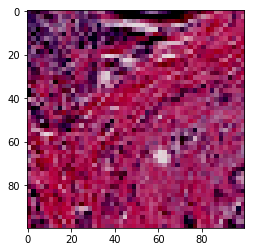

W0726 17:16:29.570915 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


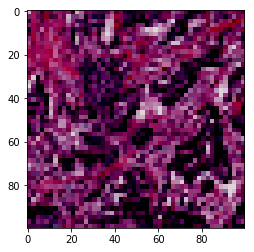

W0726 17:16:29.794128 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


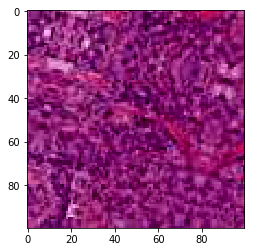

W0726 17:16:30.062107 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


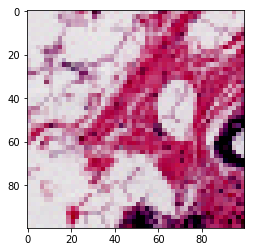

W0726 17:16:30.291542 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


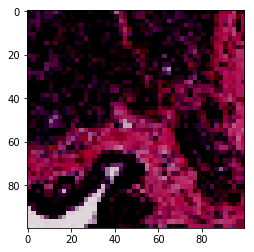

W0726 17:16:30.521299 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


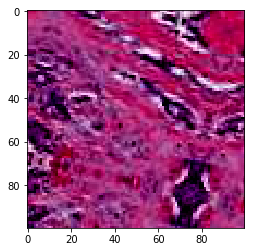

W0726 17:16:30.757390 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


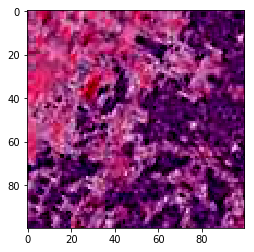

W0726 17:16:30.996274 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


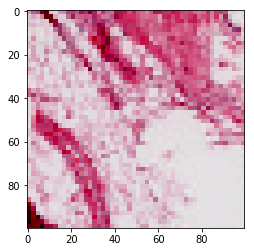

W0726 17:16:31.221975 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


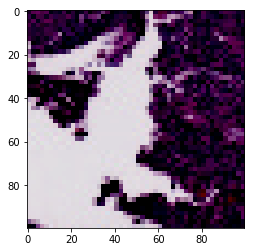

W0726 17:16:31.445919 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


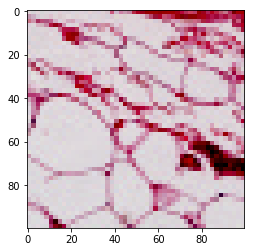

W0726 17:16:31.707047 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


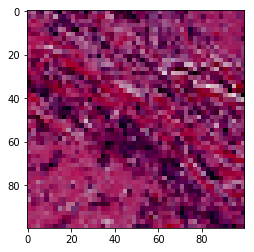

W0726 17:16:31.936843 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


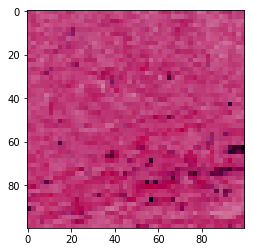

W0726 17:16:32.183609 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


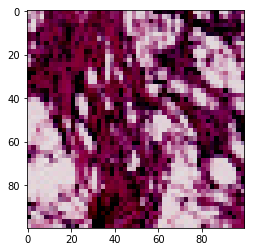

W0726 17:16:32.409074 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


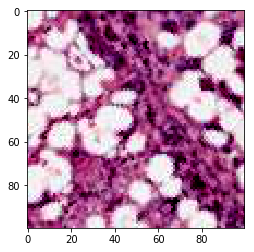

W0726 17:16:32.656398 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


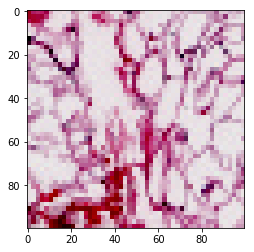

W0726 17:16:32.896603 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


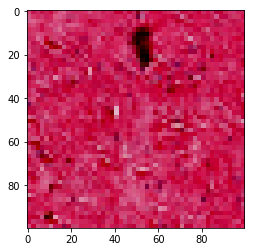

W0726 17:16:33.135868 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


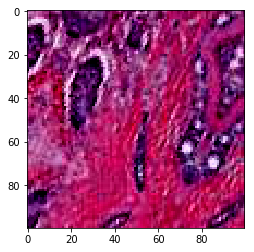

W0726 17:16:33.386221 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


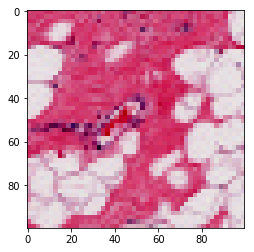

W0726 17:16:33.624605 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


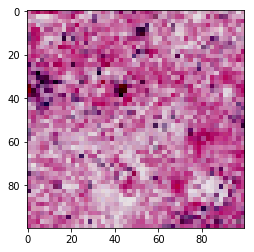

W0726 17:16:33.853573 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


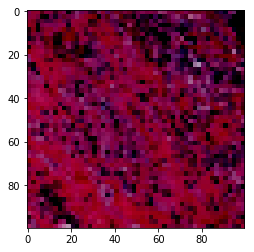

W0726 17:16:34.094103 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


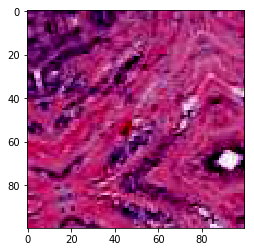

W0726 17:16:34.354180 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


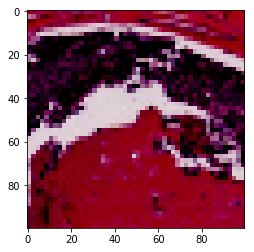

W0726 17:16:34.586348 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


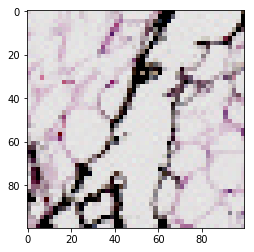

W0726 17:16:34.815479 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


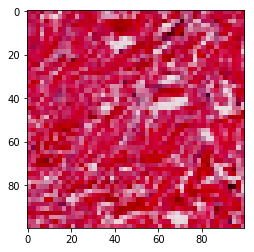

W0726 17:16:35.051126 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


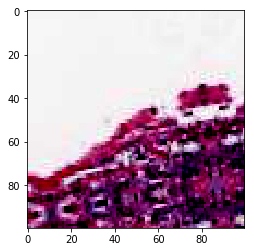

In [44]:
x, y = train_batches_bench.next()
for i in range(0,25):
    image = x[i]
    label = y[i]
    if np.argmax(label, axis=0) == 0:
      print('IDC negative')
    if np.argmax(label, axis=0) == 1:
      print('IDC positive')
    plt.imshow(image)
    plt.show()

In [45]:
# Get the labels that are associated with each index
print(valid_batches_bench.class_indices)

{'0': 0, '1': 1}


In [0]:
class_weights={
    0: 1.0, # negative
    1: 1.0, # postive 
    # make model more sensitive to positive class if necessary
}

## Train Benchmark Model

In [50]:
# Build Benchmark Model
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as K

benchmark = Sequential()
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Dropout(0.35))
benchmark.add(Flatten())
benchmark.add(Dense(256, activation='relu'))
benchmark.add(Dropout(0.5))
benchmark.add(Dense(2, activation='softmax'))
benchmark.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 100, 100, 16)      2320      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 32)        9248      
__________

In [0]:
# Compile Benchmark Model
from keras import metrics
benchmark.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Checkpointer
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='breast_histopathology_bench_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_benchmark = benchmark.fit_generator(train_batches_bench, 
                                            steps_per_epoch=train_steps, 
                                            class_weight=class_weights,
                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[checkpointer_benchmark], 
                                            epochs=30, 
                                            verbose=1)

Epoch 1/30
536/536 [==============================] - 377s 703ms/step - loss: 0.3048 - acc: 0.8624 - val_loss: 0.3612 - val_acc: 0.8350

Epoch 00001: val_loss improved from inf to 0.36125, saving model to breast_histopathology_bench_best.hdf5
Epoch 2/30
536/536 [==============================] - 349s 651ms/step - loss: 0.2398 - acc: 0.8956 - val_loss: 0.3155 - val_acc: 0.8500

Epoch 00002: val_loss improved from 0.36125 to 0.31550, saving model to breast_histopathology_bench_best.hdf5
Epoch 3/30
536/536 [==============================] - 347s 647ms/step - loss: 0.2474 - acc: 0.8929 - val_loss: 0.3236 - val_acc: 0.8520

Epoch 00003: val_loss did not improve from 0.31550
Epoch 4/30
536/536 [==============================] - 346s 646ms/step - loss: 0.2260 - acc: 0.9027 - val_loss: 0.3286 - val_acc: 0.8570

Epoch 00004: val_loss did not improve from 0.31550
Epoch 5/30
536/536 [==============================] - 346s 646ms/step - loss: 0.2231 - acc: 0.9042 - val_loss: 0.3067 - val_acc: 0.872

## Benchmark Model Evaluation

In [0]:
def plot_training(history):
  
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.plot(epochs,acc, 'b')
    plt.plot(epochs,val_acc, 'r')
    plt.title("Training & Validation Accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title("Training & Validation Loss")
    
    plt.show()

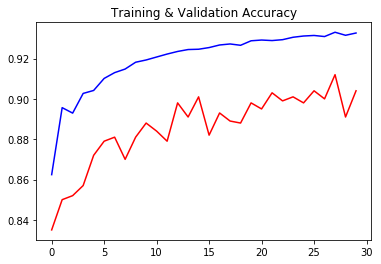

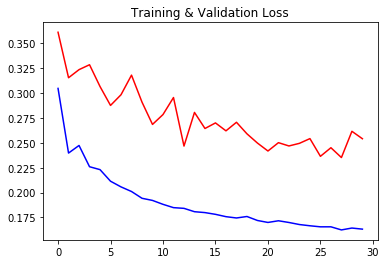

In [54]:
plot_training(history_benchmark)

In [0]:
# Load Weights of the Baseline Model
benchmark.load_weights('breast_histopathology_bench_best.hdf5')

In [56]:
# Test Predictions
preds = benchmark.predict_generator(test_batches_bench, steps=len(df_test), verbose=1)

10000/10000 [==============================] - 40s 4ms/step


In [0]:
# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_bench.classes

In [58]:
# Evaluate
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.903%
Balanced Accuracy: 0.879%


In [0]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

def matrix():
  conf_matrix = confusion_matrix(y_true, y_pred)
  plt.imshow(conf_matrix, interpolation='nearest', cmap='viridis')
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(['negative', 'positive']))
  plt.xticks(tick_marks, ['negative', 'positive'])
  plt.yticks(tick_marks, ['negative', 'positive'])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

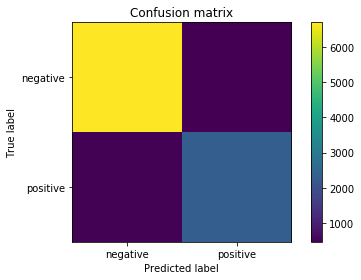

In [60]:
matrix()

In [61]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[6696,  465],
       [ 504, 2335]])

In [62]:
# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.93      0.94      0.93      7161
    positive       0.83      0.82      0.83      2839

    accuracy                           0.90     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.90      0.90      0.90     10000



IDC negative
Predicted Negative Probability: 99.87%
Predicted Positive Probability: 0.13%


W0726 20:13:59.720025 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


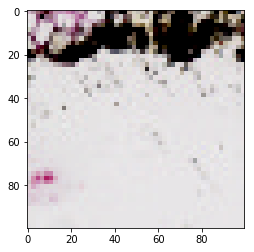

W0726 20:13:59.943894 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 99.32%
Predicted Positive Probability: 0.68%


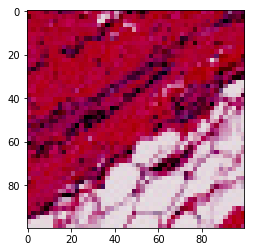

W0726 20:14:00.205970 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 98.87%
Predicted Positive Probability: 1.13%


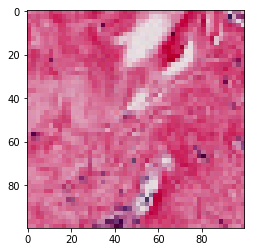

W0726 20:14:00.447600 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 88.37%
Predicted Positive Probability: 11.63%


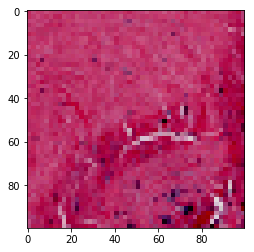

W0726 20:14:00.707430 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 99.67%
Predicted Positive Probability: 0.33%


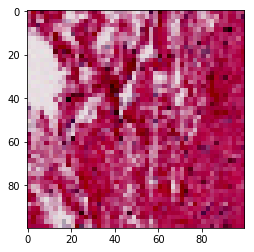

W0726 20:14:00.956062 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Predicted Negative Probability: 24.81%
Predicted Positive Probability: 75.19%


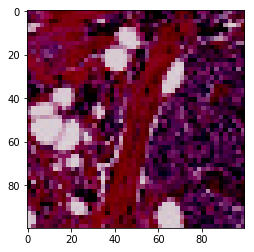

W0726 20:14:01.209000 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 98.54%
Predicted Positive Probability: 1.46%


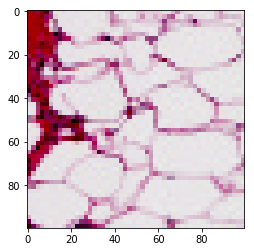

W0726 20:14:01.453990 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 91.95%
Predicted Positive Probability: 8.05%


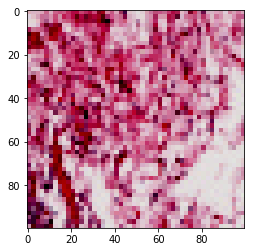

W0726 20:14:01.724929 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Predicted Negative Probability: 28.12%
Predicted Positive Probability: 71.88%


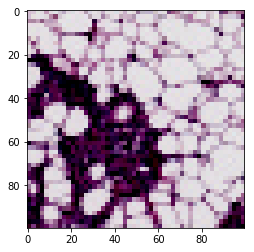

In [63]:
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  if np.argmax(label, axis=0) == 0:
      print('IDC negative')
  if np.argmax(label, axis=0) == 1:
    print('IDC positive')

  prob = benchmark.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Predicted Negative Probability: {(b*100):1.2f}%')
      print(f'Predicted Positive Probability: {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()

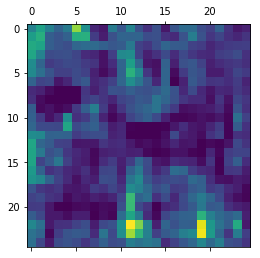

W0726 20:15:02.121720 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


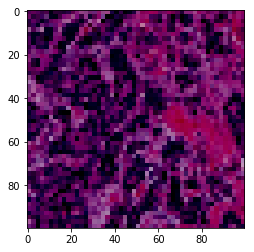

In [64]:
# Class Activation Maps

last_conv_layer = benchmark.layers[10]

x, y = valid_batches_bench.next()

output = benchmark.output[:, y_pred[0]]
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([benchmark.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(32):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

plt.imshow(x[0])
plt.show()

In [0]:
# Get filters and biases

def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name, filters.shape)
    return filter_whole, layer_whole

In [66]:
filter_whole, layer_whole = get_name_layer_filters(benchmark)

conv2d_10 (3, 3, 3, 16)
conv2d_11 (3, 3, 16, 16)
conv2d_12 (3, 3, 16, 16)
conv2d_13 (3, 3, 16, 32)
conv2d_14 (3, 3, 32, 32)
conv2d_15 (3, 3, 32, 32)
conv2d_16 (3, 3, 32, 64)
conv2d_17 (3, 3, 64, 64)
conv2d_18 (3, 3, 64, 64)


In [203]:
# Output of 1st Convolutional Layer
cam_layer = benchmark.layers[2]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 16, 16)
(16,)


In [0]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

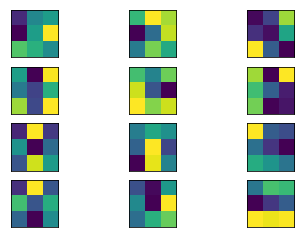

In [205]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
from keras.models import Model
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [0]:
x, y = valid_batches_bench.next()
test_label = y[123]
test_image = x[123]
test_image_np = np.expand_dims(test_image, axis=0)

W0726 20:20:19.221271 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Predicted Negative Probability: 37.46%
Predicted Positive Probability: 62.54%


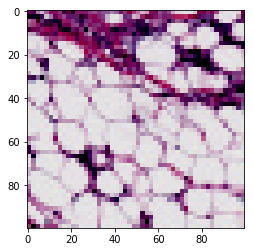

In [208]:
plt.imshow(test_image)

if np.argmax(test_label, axis=0) == 0:
  print('IDC negative')
if np.argmax(test_label, axis=0) == 1:
  print('IDC positive')
  
prob = benchmark.predict(test_image.reshape(1,100,100,3))
for a in prob:
  for b in a:
    print(f'Predicted Negative Probability: {(b*100):1.2f}%')
    print(f'Predicted Positive Probability: {(1-b)*100:1.2f}%')
    break

In [209]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 100, 100, 16)

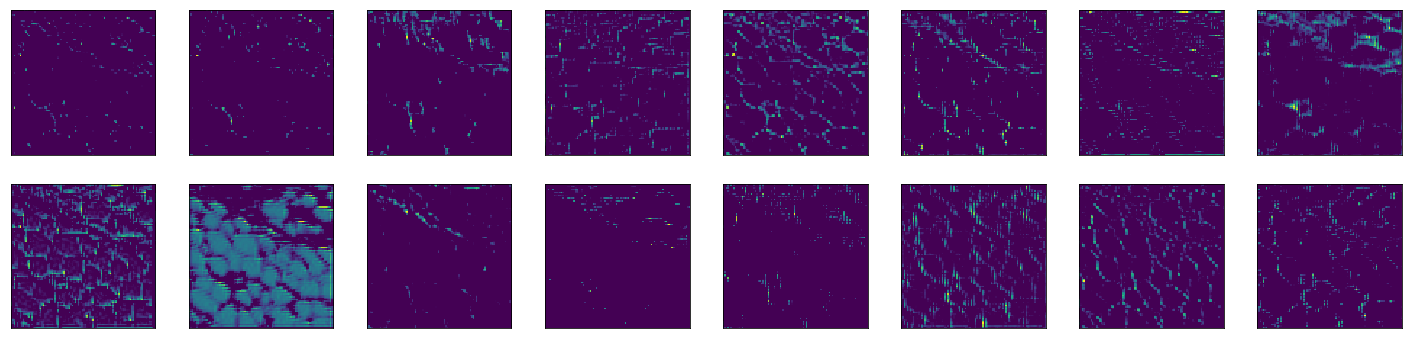

In [210]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(4):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [211]:
# Output of 2nd Convolutional Layer
cam_layer = benchmark.layers[6]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 32, 32)
(32,)


In [0]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

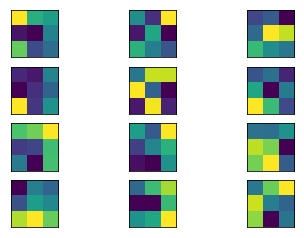

In [213]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [215]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 50, 50, 32)

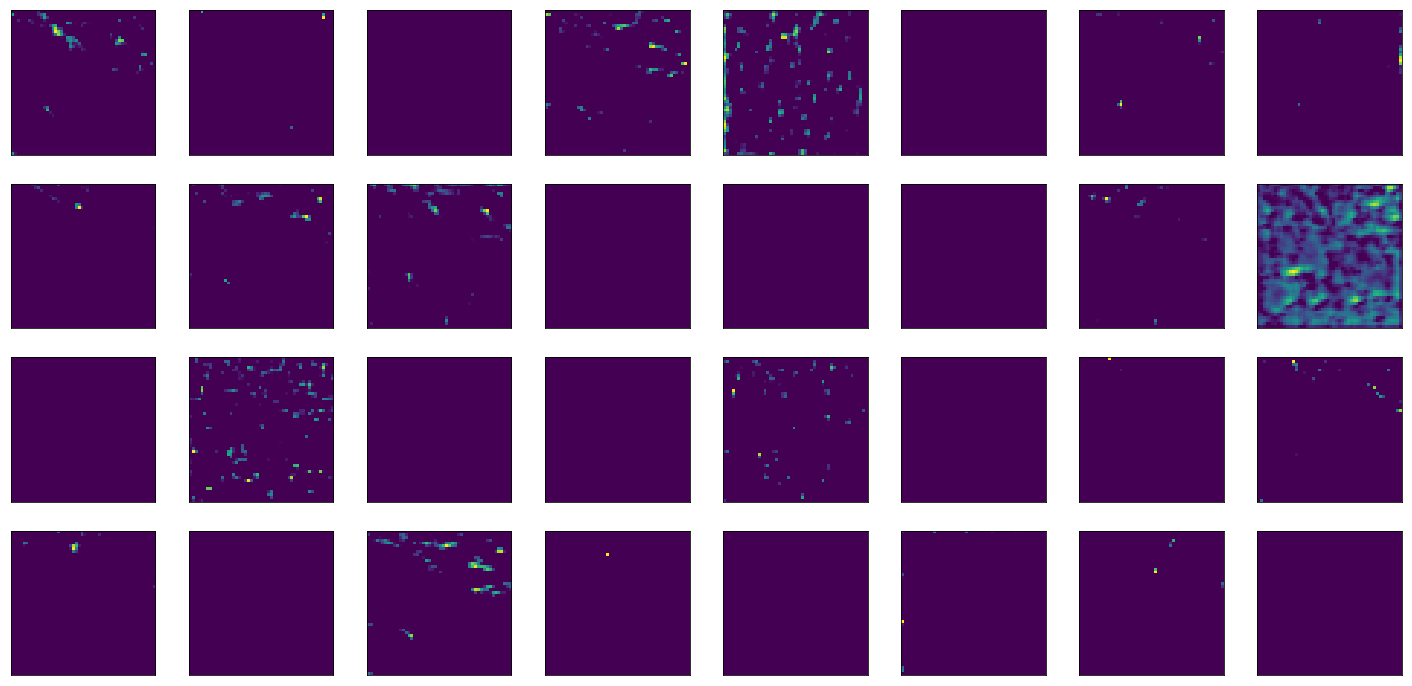

In [216]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [217]:
# Output of 3rd Convolutional Layer
cam_layer = benchmark.layers[10]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 64, 64)
(64,)


In [0]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

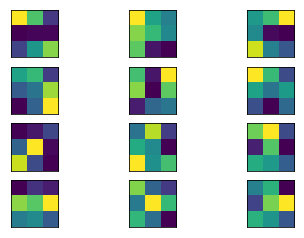

In [219]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [221]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 25, 25, 64)

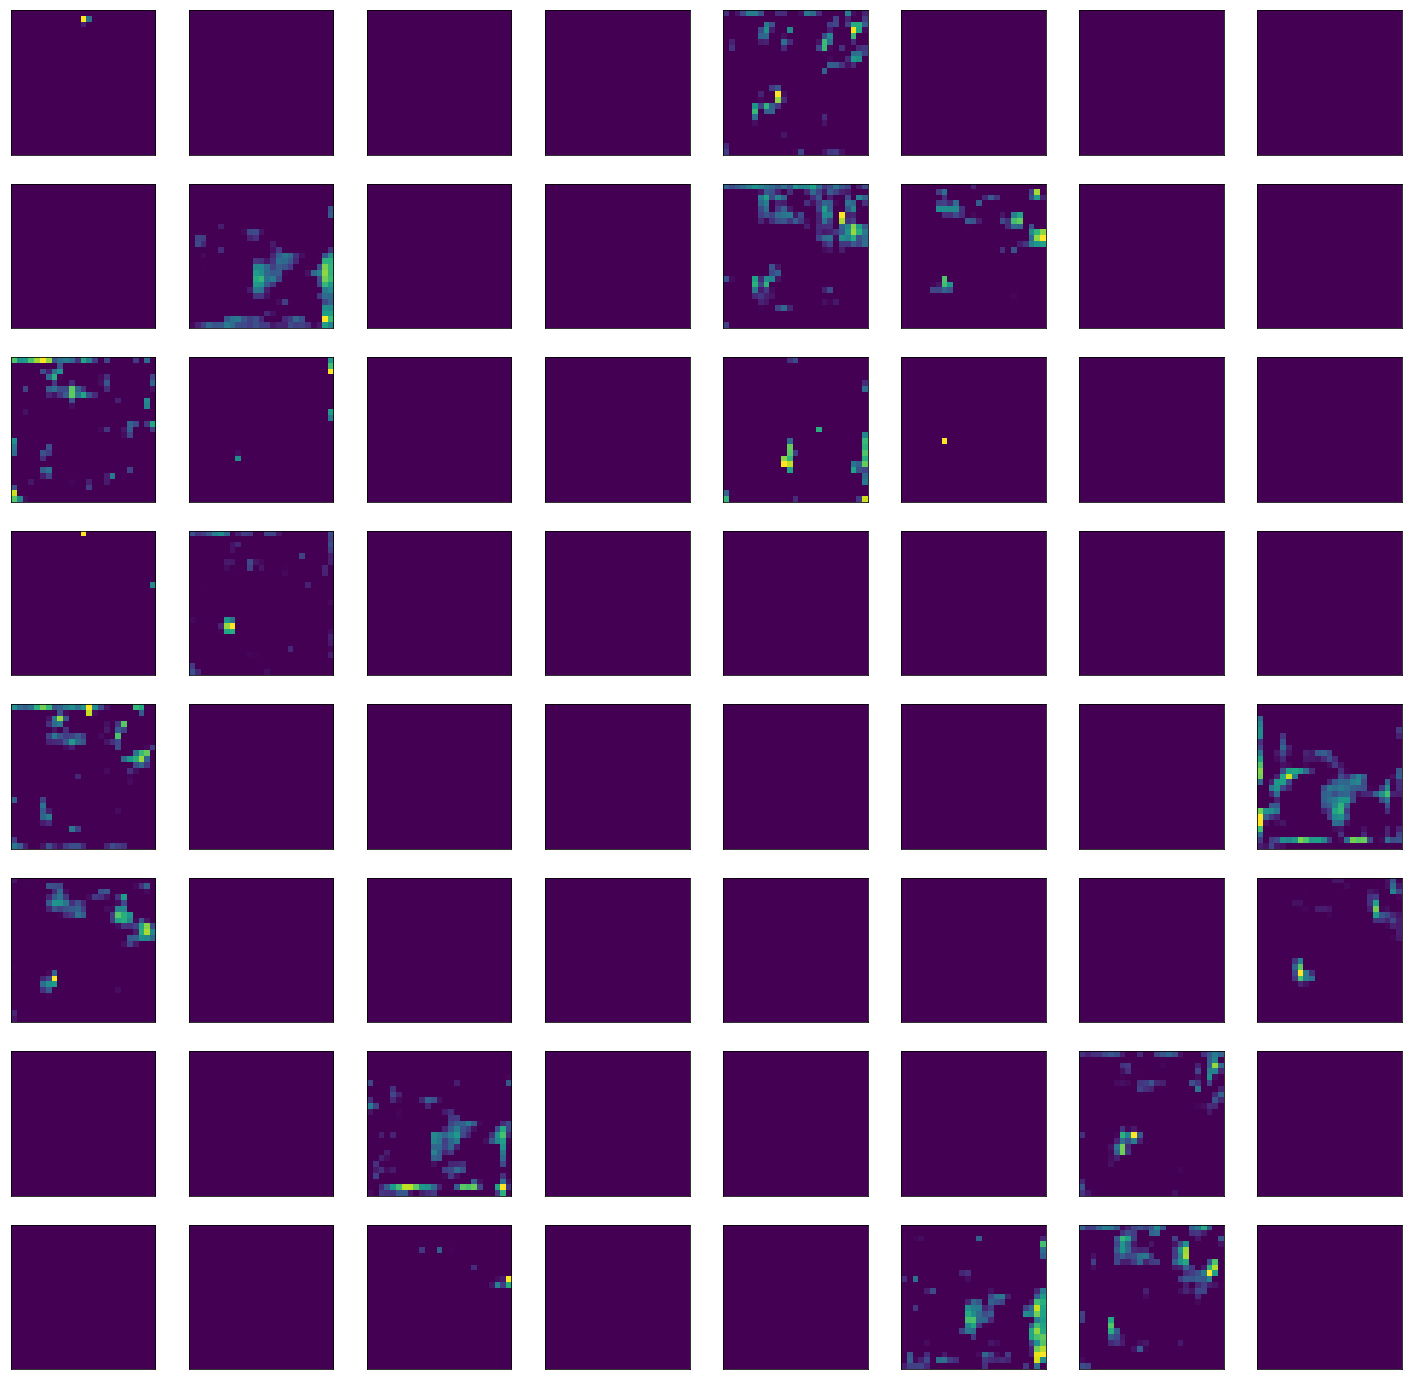

In [222]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(8):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

## Train Transfer Learning Model Including Benchmark Model's Weights
Transfer Learning Model Had Less Accuracy & Worse Performance

In [223]:
# Load Pre-Trained Model
from keras.applications.inception_v3 import InceptionV3
base = InceptionV3(include_top=False, weights='imagenet', pooling=None, input_shape=(image_size, image_size, 3))

W0726 20:20:46.387045 139884069193600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0726 20:20:47.947967 139884069193600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



87916544/87910968 [==============================] - 3s 0us/step


In [224]:
# Build Transfer Learning Model

from keras.models import Model

last = base.output
x = GlobalAveragePooling2D()(last)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(2, activation='softmax')(x)

transfer = Model(base.input, preds)
transfer.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 49, 49, 32)   96          conv2d_19[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 49, 49, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_20 

In [0]:
# Load Weights of the Benchmark Model
base.load_weights('breast_histopathology_bench_best.hdf5', by_name=True)

In [226]:
# How many layers Base Model has
print(len(base.layers))

311


In [0]:
# Freeze original layers of Base Model
for layer in base.layers:
    layer.trainable = False

In [0]:
# Compile Transfer Learning Model
from keras import metrics
transfer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [230]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input,
                             horizontal_flip=True,
                             vertical_flip=True, 
                             fill_mode='nearest')

train_batches_transfer = datagen.flow_from_directory(train_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=train_batch_size)

valid_batches_transfer = datagen.flow_from_directory(valid_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=val_batch_size)

test_batches_transfer = datagen.flow_from_directory(test_path,
                                                    target_size=(image_size, image_size),
                                                    batch_size=1,
                                                    shuffle=False) # test dataset should not be shuffled

Found 383171 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [231]:
# Checkpointer
checkpointer_transfer = ModelCheckpoint(filepath='breast_histopathology_transfer_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_transfer = transfer.fit_generator(train_batches_transfer, 
                                       steps_per_epoch=train_steps, 
                                       class_weight=class_weights,
                                       validation_data=valid_batches_transfer,
                                       validation_steps=val_steps,
                                       callbacks=[checkpointer_transfer], 
                                       epochs=10, 
                                       verbose=1)

Epoch 1/10
536/536 [==============================] - 239s 447ms/step - loss: 0.5027 - acc: 0.7614 - val_loss: 0.7572 - val_acc: 0.7420

Epoch 00001: val_loss improved from inf to 0.75723, saving model to breast_histopathology_transfer_best.hdf5
Epoch 2/10
536/536 [==============================] - 224s 417ms/step - loss: 0.4699 - acc: 0.7806 - val_loss: 0.6427 - val_acc: 0.7260

Epoch 00002: val_loss improved from 0.75723 to 0.64266, saving model to breast_histopathology_transfer_best.hdf5
Epoch 3/10
536/536 [==============================] - 224s 419ms/step - loss: 0.4637 - acc: 0.7841 - val_loss: 0.6819 - val_acc: 0.7500

Epoch 00003: val_loss did not improve from 0.64266
Epoch 4/10
536/536 [==============================] - 224s 418ms/step - loss: 0.4586 - acc: 0.7868 - val_loss: 0.6011 - val_acc: 0.7520

Epoch 00004: val_loss improved from 0.64266 to 0.60110, saving model to breast_histopathology_transfer_best.hdf5
Epoch 5/10
536/536 [==============================] - 221s 412ms/s

## Transfer Learning Model Evaluation


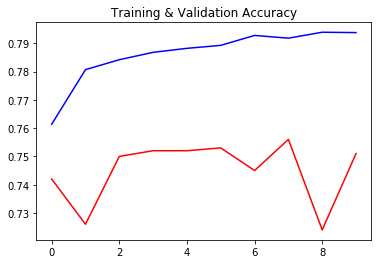

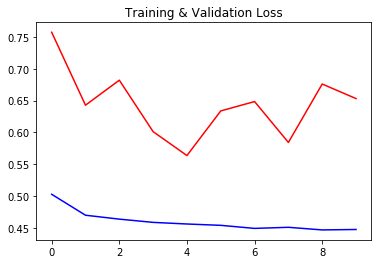

In [241]:
plot_training(history_transfer)

In [0]:
# Load Weights of the Transfer Learning Model
transfer.load_weights('breast_histopathology_transfer_best.hdf5')

In [243]:
# Test Predictions
preds = transfer.predict_generator(test_batches_transfer, steps=len(df_test), verbose=1)

10000/10000 [==============================] - 389s 39ms/step


In [0]:
# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_transfer.classes

In [245]:
# Evaluate
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.747%
Balanced Accuracy: 0.601%


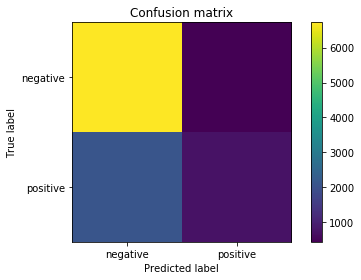

In [246]:
matrix()

In [247]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[6723,  438],
       [2093,  746]])

In [248]:
# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.76      0.94      0.84      7161
    positive       0.63      0.26      0.37      2839

    accuracy                           0.75     10000
   macro avg       0.70      0.60      0.61     10000
weighted avg       0.72      0.75      0.71     10000



W0726 21:14:41.149953 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 99.60%
Prob Positive 0.40%


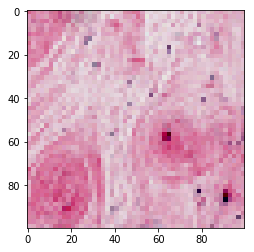

W0726 21:14:41.429486 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 69.19%
Prob Positive 30.81%


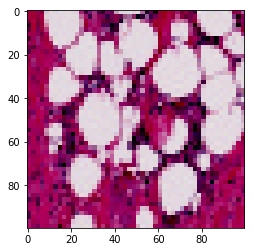

W0726 21:14:41.709154 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 99.80%
Prob Positive 0.20%


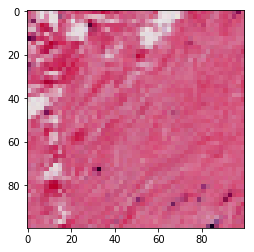

W0726 21:14:42.005904 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Prob Negative: 41.12%
Prob Positive 58.88%


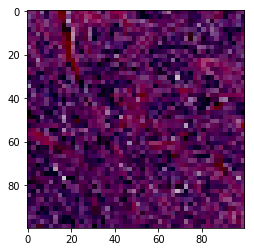

W0726 21:14:42.293389 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Prob Negative: 56.48%
Prob Positive 43.52%


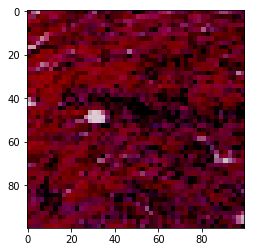

W0726 21:14:42.566938 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 88.25%
Prob Positive 11.75%


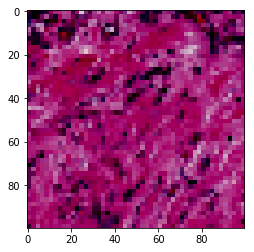

W0726 21:14:42.858427 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 91.12%
Prob Positive 8.88%


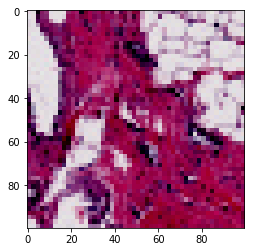

W0726 21:14:43.151275 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 63.87%
Prob Positive 36.13%


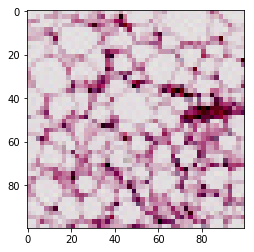

W0726 21:14:43.436961 139884069193600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 99.80%
Prob Positive 0.20%


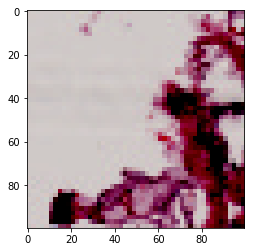

In [249]:
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  for j in label:
    if j == 1:
      print('IDC negative')
      break
    if j+1 == 1:
      print('IDC positive')
      break
    else:
      break

  prob = transfer.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Prob Negative: {(b*100):1.2f}%')
      print(f'Prob Positive {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()